<a href="https://colab.research.google.com/github/MontGst/HCA/blob/main/U2_Tarea2_G%C3%B3mez_Soto_Montserrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**T2:** Genera tu propio mapa 🗺

Gómez Soto Montserrat

* Usa un buffer de 15 km del río Papaloapan (15000 metros o 0.135 °)
* Usa el EPSG:6372 como proyección proyectada
* Opera usando las 4 funciones máscara [intersects, within, touches, overlaps con los municipios SIN BUFFER
* Coloca el Río Papaloapan de color ‘lawngreen’ con un grosor de 1.5 pts.
* Los puntos deben ser de color rojo (intersects), amarillo (within), touches (verde), overlaps (naranja). Los puntos que sean de tamaño de 10 pts^2.
* El buffer del río debe tener una transparencia del 60%
* Coloca el color de la tierra en ‘papayawhip’
* La extensión del mapa es libre.
* Agrega el océano a tu gráfica usando features con un color ‘dodgerblue’
* Utiliza cartopy para generar tu gráfica


In [55]:
! pip install cartopy  #! ejecutar en la terminal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 78.8 MB/s eta 0:00:00


In [56]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature  #capas de cartopy preinstaladas
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  #Indicadores de mapa latitudes y longitudes

In [1]:
# O. Importacion de librerias  utiles

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import Point, LineString, Polygon

# 0.1 Para la carga de un archivo desde el ordenador
from google.colab import files


# 0.2 Biblioteca para leer un archivo zipfile
import zipfile

In [2]:
rivers = files.upload()
zipfile_name = list(rivers.keys())[0]
rios = gpd.read_file(f"zip://{zipfile_name}")

Saving hidro4mgw.zip to hidro4mgw.zip


In [87]:
cabeceras = files.upload()
zipfile_name = list(cabeceras.keys())[0]
cabeceras = gpd.read_file(f"zip://{zipfile_name}")

Saving cabmun2kgw.zip to cabmun2kgw (1).zip


In [30]:
uploaded = files.upload()
zipfile_name = list(uploaded.keys())[0]
estados = gpd.read_file(f"zip://{zipfile_name}")

Saving dest22gw.zip to dest22gw.zip


In [88]:
cabeceras[cabeceras.NOMENT.fillna('').str.contains('VERACRUZ')]
rios[rios.NOMBRES.fillna('').str.contains('Papaloapan')]
estados[estados.NOMGEO.fillna('').str.contains('Veracruz')]

,CVEGEO,NOMGEO,NOM_ENT,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
29,30,Veracruz de Ignacio de la Llave,Veracruz de Ignacio de la Llave,870001,Xalapa-EnrÃ­quez,29,30,7.146742e+06,3.538972e+06,"MULTIPOLYGON (((-94.93373 17.40204, -94.93327 ..."


In [161]:
#Para obtener la cabecera municipal de Veracruz
cabeceras_veracruz = cabeceras.loc[cabeceras.NOMENT.eq('VERACRUZ-LLAVE')]

#Río Papaloapan
rio_papaloapan= rios.loc[rios.NOMBRES.eq('R. Papaloapan')]

#Estado
estado_veracruz= estados.loc[estados.NOMGEO.eq('Veracruz de Ignacio de la Llave')]

<Axes: >

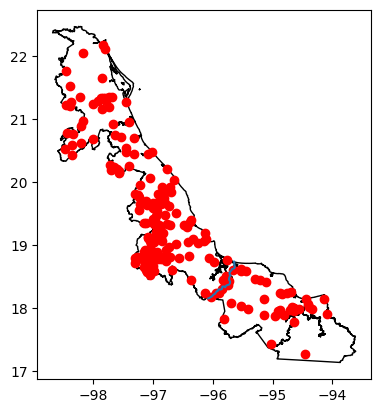

In [162]:
ax = estado_veracruz.plot( color = 'white', edgecolor='black')
cabeceras_veracruz.plot(ax = ax, color = 'red')
rio_papaloapan.plot(ax = ax)

<ipython-input-134-dcf6821d3eb5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cabeceras_veracruz.buffer(0.05).plot()


<Axes: >

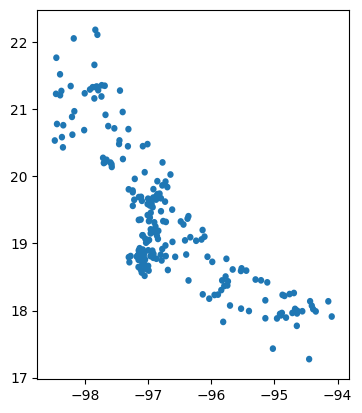

In [134]:
cabeceras_veracruz.buffer(0.05).plot()

In [262]:
estado_veracruz.crs
estado_veracruz_ITRF98 = estado_veracruz.to_crs(epsg=6372)


In [164]:
rio_papaloapan = rio_papaloapan.to_crs("EPSG:6372")
rio_papaloapan.crs


<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [275]:
cabeceras_veracruz_ITRF98 = cabeceras_veracruz.to_crs(epsg=6372)
cabeceras_veracruz_ITRF98['buffer_cabeceras'] = cabeceras_veracruz_ITRF98.buffer(1500)
cabeceras_veracruz_ITRF98.set_geometry('buffer_cabeceras', inplace = True)

<Axes: >

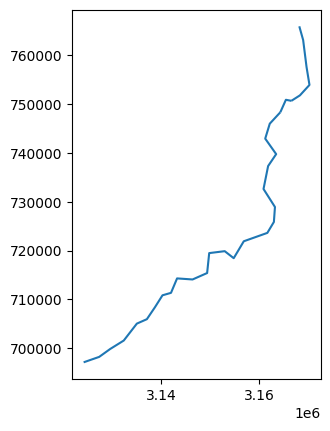

In [169]:
rio_papaloapan
rio_papaloapan.union_all()
rio_papaloapan_unico = rio_papaloapan.union_all()
rio_papaloapan_unico.geom_type

#Elemento geométrico
gdf_rio_papaloapan = gpd.GeoDataFrame(geometry = [rio_papaloapan_unico], crs=rio_papaloapan.crs)
gdf_rio_papaloapan
gdf_rio_papaloapan.plot()

<ipython-input-276-9b8b722c8493>:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  cabeceras_veracruz_ITRF98.plot(column='geometry',ax=ax, color ='red')


<Axes: >

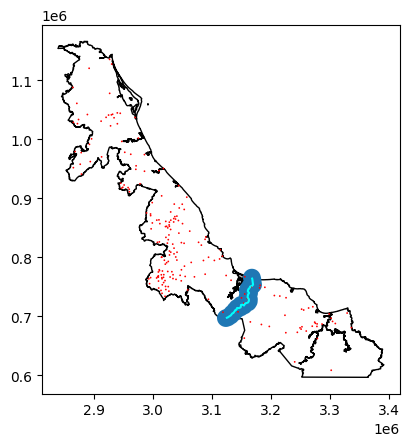

In [276]:
ax = estado_veracruz_ITRF98.plot( color = 'white', edgecolor='black')
rio_papaloapan.plot(ax = ax, color = 'cyan')
gdf_rio_papaloapan.buffer(15000).plot(ax=ax)
cabeceras_veracruz_ITRF98.plot(column='geometry',ax=ax, color ='red')

In [277]:
buffer_rio = gdf_rio_papaloapan.buffer(15000)
mask_intersects = cabeceras_veracruz_ITRF98.geometry.apply(lambda x: x.intersects(buffer_rio.iloc[0]))
cabeceras_veracruz_intersecta = cabeceras_veracruz_ITRF98[mask_intersects.values]  #Aplico máscara dentro del dataframe original
cabeceras_veracruz_intersecta

,AREA,PERIMETER,COV_,COV_ID,ENT,NOMENT,MUN,NOMMUN,LOC,CABECERA,ALTITUD,LONG,LAT,CLAVE,POBTOTAL,geometry,buffer_cabeceras
167,0.0,0.0,168,168,30,VERACRUZ-LLAVE,005,ACULA,0001,ACULA,10.0,-95.77356,18.50678,300050001,2539.0,POINT (3156204.868 738060.276),"POLYGON ((3157704.868 738060.276, 3157697.645 ..."
173,0.0,0.0,174,174,30,VERACRUZ-LLAVE,011,ALVARADO,0001,ALVARADO,10.0,-95.76079,18.77094,300110001,22608.0,POINT (3156280.628 767276.218),"POLYGON ((3157780.628 767276.218, 3157773.406 ..."
174,0.0,0.0,175,175,30,VERACRUZ-LLAVE,012,AMATITLAN,0001,AMATITLAN,5.0,-95.73606,18.43511,300120001,1328.0,POINT (3160500.144 730320.223),"POLYGON ((3162000.144 730320.223, 3161992.921 ..."
207,0.0,0.0,208,208,30,VERACRUZ-LLAVE,045,COSAMALOAPAN DE CARPIO,0001,COSAMALOAPAN,5.0,-95.79551,18.36568,300450001,28496.0,POINT (3154567.352 722380.923),"POLYGON ((3156067.352 722380.923, 3156060.129 ..."
216,0.0,0.0,217,217,30,VERACRUZ-LLAVE,054,CHACALTIANGUIS,0001,CHACALTIANGUIS,10.0,-95.84217,18.30485,300540001,3997.0,POINT (3149936.069 715451.629),"POLYGON ((3151436.069 715451.629, 3151428.846 ..."
246,0.0,0.0,247,247,30,VERACRUZ-LLAVE,084,IXMATLAHUACAN,0001,IXMATLAHUACAN,10.0,-95.82884,18.44900,300840001,1681.0,POINT (3150656.83 731429.734),"POLYGON ((3152156.83 731429.734, 3152149.607 7..."
259,0.0,0.0,260,260,30,VERACRUZ-LLAVE,097,LERDO DE TEJADA,0001,LERDO DE TEJADA,10.0,-95.52050,18.62873,300970001,18539.0,POINT (3182248.293 752702.113),"POLYGON ((3183748.293 752702.113, 3183741.071 ..."
281,0.0,0.0,282,282,30,VERACRUZ-LLAVE,119,OTATITLAN,0001,OTATITLAN,15.0,-96.03273,18.17708,301190001,4554.0,POINT (3130422.186 700488.788),"POLYGON ((3131922.186 700488.788, 3131914.963 ..."
301,0.0,0.0,302,302,30,VERACRUZ-LLAVE,139,SALTABARRANCA,0001,SALTABARRANCA,10.0,-95.53133,18.59039,301390001,2896.0,POINT (3181299.286 748419.086),"POLYGON ((3182799.286 748419.086, 3182792.063 ..."
338,0.0,0.0,339,339,30,VERACRUZ-LLAVE,176,TLACOJALPAN,0001,TLACOJALPAN,10.0,-95.94967,18.23235,301760001,4003.0,POINT (3138934.494 706962.077),"POLYGON ((3140434.494 706962.077, 3140427.271 ..."


In [278]:
mask_overlaps = cabeceras_veracruz_ITRF98.geometry.apply(lambda x: x.overlaps(buffer_rio.iloc[0]))
mask_within = cabeceras_veracruz_ITRF98.geometry.apply(lambda x: x.within(buffer_rio.iloc[0]))
mask_touches = cabeceras_veracruz_ITRF98.geometry.apply(lambda x: x.touches(buffer_rio.iloc[0]))

In [279]:
#Aplico máscaras dentro del dataframe original
cabeceras_veracruz_overlaps = cabeceras_veracruz_ITRF98[mask_overlaps.values]
cabeceras_veracruz_within = cabeceras_veracruz_ITRF98[mask_within.values]
cabeceras_veracruz_touches = cabeceras_veracruz_ITRF98[mask_touches.values]

<ipython-input-280-5d37c1ad7830>:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  cabeceras_veracruz_intersecta.plot(column= 'geometry', ax = ax1, color = 'red')
<ipython-input-280-5d37c1ad7830>:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  cabeceras_veracruz_within.plot(column= 'geometry', ax = ax2, color = 'yellow')
<ipython-input-280-5d37c1ad7830>:14: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  cabeceras_veracruz_touches.plot(column= 'geometry', ax = ax3, color = 'green')
<ipython-input-280-5d37c1ad7830>:14: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  cabeceras_veracruz_touches.plot(column= 'geometry', ax = ax3, color = 'green')
<ipython-input-280-5d37c1ad7830>:19: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  cabeceras_veracruz_overlaps.plot(column= 'geometry', ax = ax4, color = 'orange')
<ipython-input-280-5d37c1ad7830>:19: U

<Axes: >

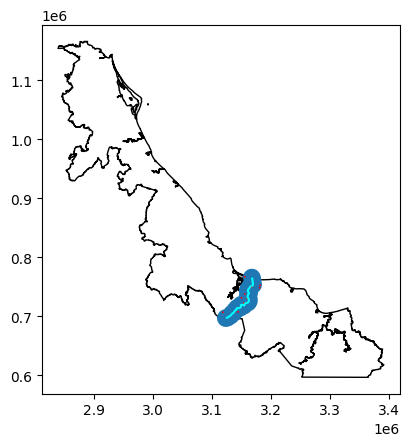

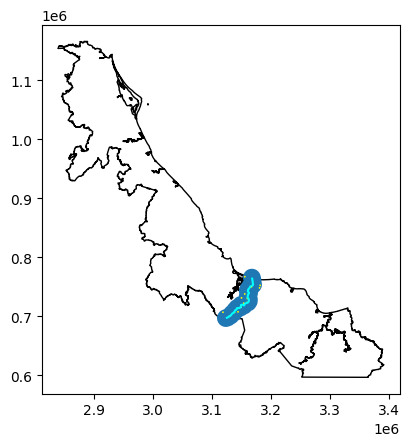

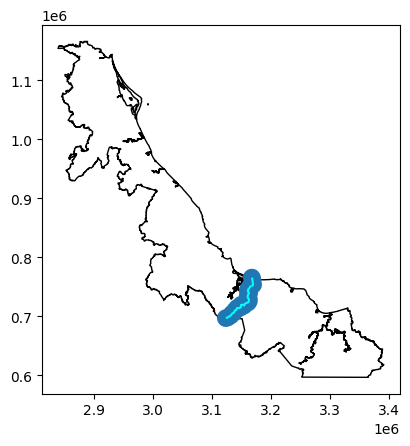

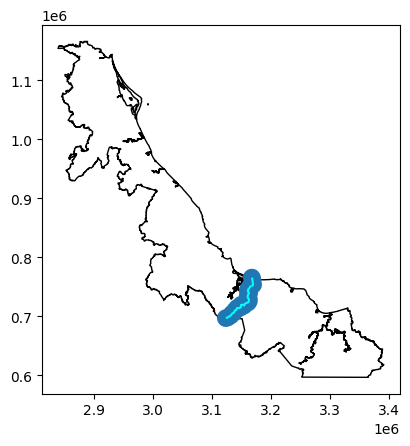

In [280]:
ax1 = estado_veracruz_ITRF98.plot( color = 'white', edgecolor='black')
rio_papaloapan.plot(ax = ax1, color = 'cyan')
gdf_rio_papaloapan.buffer(15000).plot(ax=ax1)
cabeceras_veracruz_intersecta.plot(column= 'geometry', ax = ax1, color = 'red')

ax2 = estado_veracruz_ITRF98.plot( color = 'white', edgecolor='black')
rio_papaloapan.plot(ax = ax2, color = 'cyan')
gdf_rio_papaloapan.buffer(15000).plot(ax=ax2)
cabeceras_veracruz_within.plot(column= 'geometry', ax = ax2, color = 'yellow')

ax3 = estado_veracruz_ITRF98.plot( color = 'white', edgecolor='black')
rio_papaloapan.plot(ax = ax3, color = 'cyan')
gdf_rio_papaloapan.buffer(15000).plot(ax=ax3)
cabeceras_veracruz_touches.plot(column= 'geometry', ax = ax3, color = 'green')

ax4 = estado_veracruz_ITRF98.plot( color = 'white', edgecolor='black')
rio_papaloapan.plot(ax = ax4, color = 'cyan')
gdf_rio_papaloapan.buffer(15000).plot(ax=ax4)
cabeceras_veracruz_overlaps.plot(column= 'geometry', ax = ax4, color = 'orange')


In [221]:
#Función que nos regaló el profesor
def configurar_mapa(ax, lon_extent=(-120, -80), lat_extent=(10, 35), lon_extent_begin = 1,
                    lat_extent_begin= 1, linewidth=2, tick_width=3, tick_size=10, label_size=20,
                     grid_spacing=4, grid_color='w', grid_alpha=0.6, grid_linestyle='--',
                     land_color='lightgray', land_alpha=0.8,
                     lon_tick_spacing=4, lat_tick_spacing=4, crs=ccrs.PlateCarree()):
     # Añadir características geográficas
    ax.add_feature(cfeature.COASTLINE, linewidth=linewidth)
    ax.add_feature(cfeature.BORDERS, linewidth=linewidth)
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor=land_color, alpha=land_alpha, zorder=0)
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='dodgerblue', zorder=0)  #Agregar océano

    # Configurar el grosor del borde del mapa y los ticks
    ax.spines['geo'].set_linewidth(tick_width)
    ax.tick_params(axis='both', width=tick_width, size=tick_size, which='both', labelsize=label_size)

    # Definir la extensión del mapa
    ax.set_extent([lon_extent[0], lon_extent[1], lat_extent[0], lat_extent[1]], crs)

    # Configurar los ticks de los ejes
    ax.set_xticks(np.arange(lon_extent[0], lon_extent[1] + lon_extent_begin, lon_tick_spacing), crs=crs)
    ax.set_yticks(np.arange(lat_extent[0]+ lat_extent_begin, lat_extent[1] + lat_extent_begin, lat_tick_spacing), crs=crs)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # Añadir líneas de cuadrícula
    ax.gridlines(draw_labels=False, linewidth=1, color=grid_color, alpha=grid_alpha, linestyle=grid_linestyle, zorder=3,
                 xlocs=np.arange(lon_extent[0], lon_extent[1] + 1, grid_spacing),
                 ylocs=np.arange(lat_extent[0], lat_extent[1] + 1, grid_spacing))


<ipython-input-284-8e54ea20f5af>:12: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_rio = gdf_rio_papaloapan.to_crs("EPSG:4326").buffer(0.135)
<ipython-input-284-8e54ea20f5af>:28: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  df.plot(ax=a, color=colors[idx], zorder=3, markersize=5)
<ipython-input-284-8e54ea20f5af>:28: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  df.plot(ax=a, color=colors[idx], zorder=3, markersize=5)


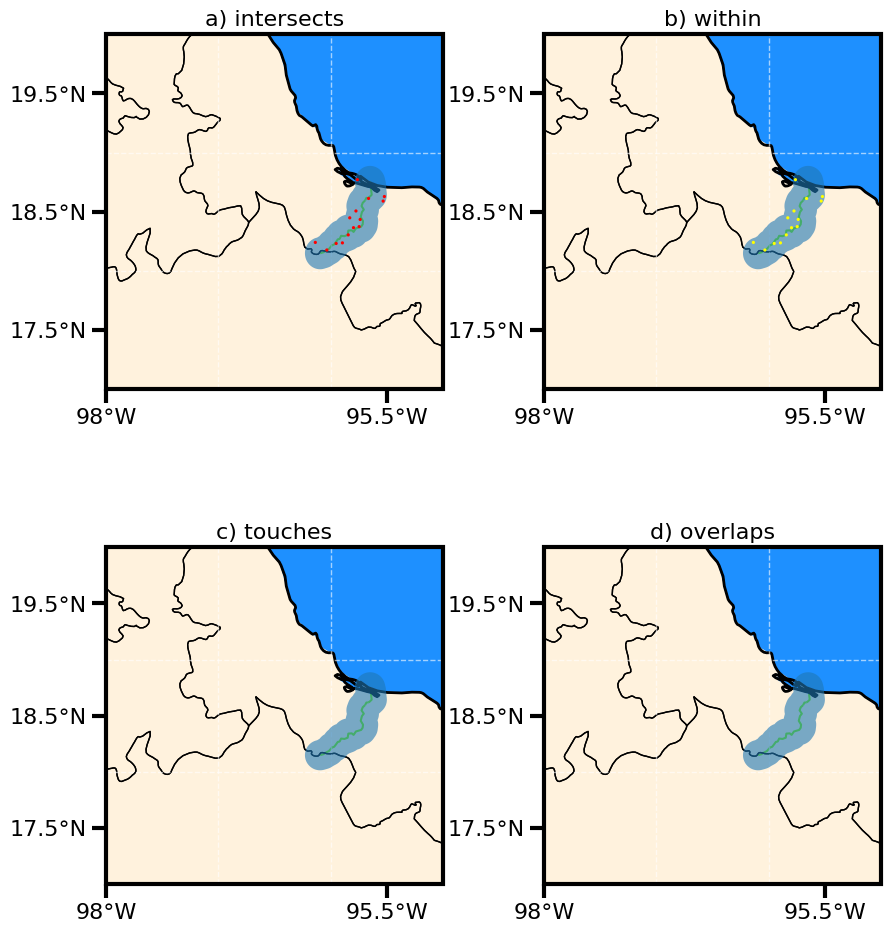

In [284]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12), subplot_kw={"projection":ccrs.PlateCarree()})
fig.subplots_adjust(wspace=0.3, hspace=0.2)

dataframes = [cabeceras_veracruz_intersecta, cabeceras_veracruz_within,
              cabeceras_veracruz_touches, cabeceras_veracruz_overlaps]
names = ['a) intersects', 'b) within', 'c) touches', 'd) overlaps']
colors = ['red', 'yellow', 'green', 'orange']

# Convertir todos los GeoDataFrames a EPSG:4326
estado = estado_veracruz_ITRF98.to_crs("EPSG:4326")
rio = rio_papaloapan.to_crs("EPSG:4326")
buffer_rio = gdf_rio_papaloapan.to_crs("EPSG:4326").buffer(0.135)

for idx, a in enumerate(ax.flatten()):
    # Configurar el fondo del mapa con océano
   configurar_mapa(a, lon_extent=(-98, -95), lat_extent=(17, 20), lon_extent_begin = 0.5, lat_extent_begin = 0.5,
                   label_size = 16,  land_color='papayawhip', grid_spacing = 1, lon_tick_spacing=2.5, lat_tick_spacing=1)
   a.add_feature(cfeature.STATES)

   rio.plot(ax=a, color='lawngreen', zorder=1)
   gpd.GeoSeries(buffer_rio).plot(ax=a, alpha=0.6, zorder=2)

    # Cabeceras (datos principales)
   df = dataframes[idx]
   try:
        df.to_crs("EPSG:4326").plot(ax=a, color=colors[idx], zorder=3, markersize=5)
   except:
        df.plot(ax=a, color=colors[idx], zorder=3, markersize=5)

   a.set_title(names[idx], fontsize=16)

